Quantum Half Adder (A=1, B=1)
Measurement results: {'10': 1024}


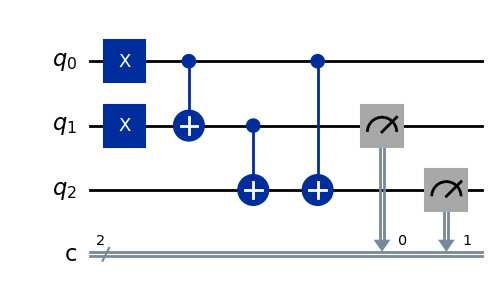

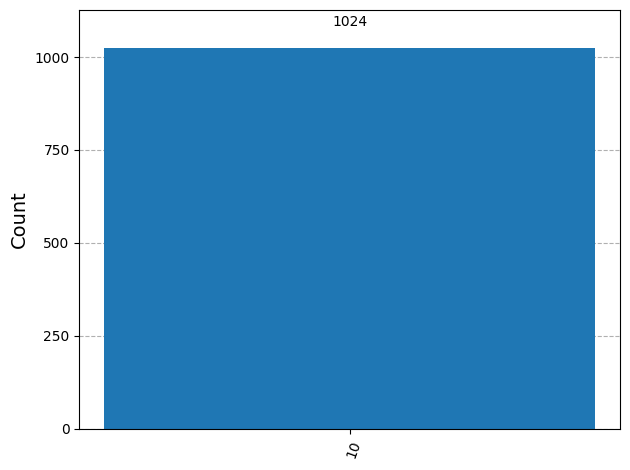


Quantum Half Subtractor (A=1, B=0)
Measurement results: {'01': 1024}


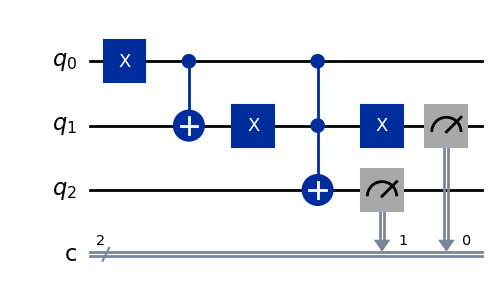

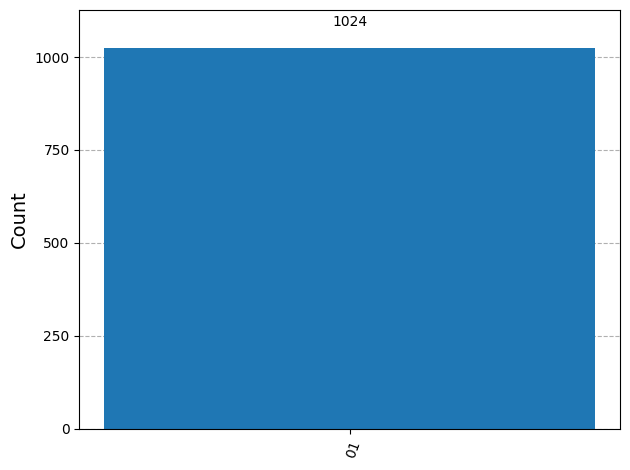


Quantum Full Adder (A=1, B=1, C_in=1)
Measurement results: {'11': 1024}


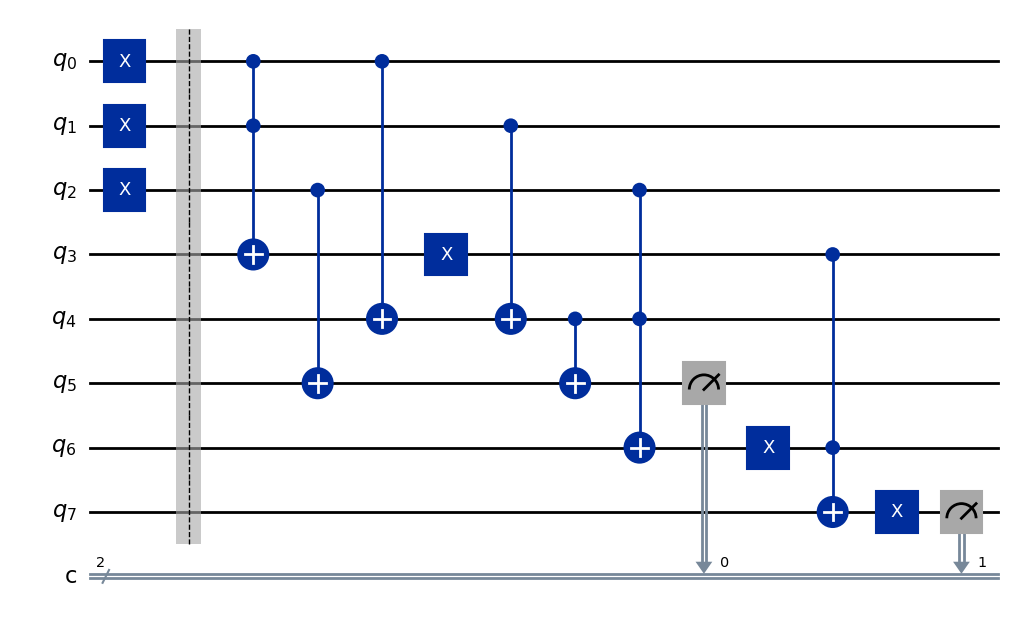

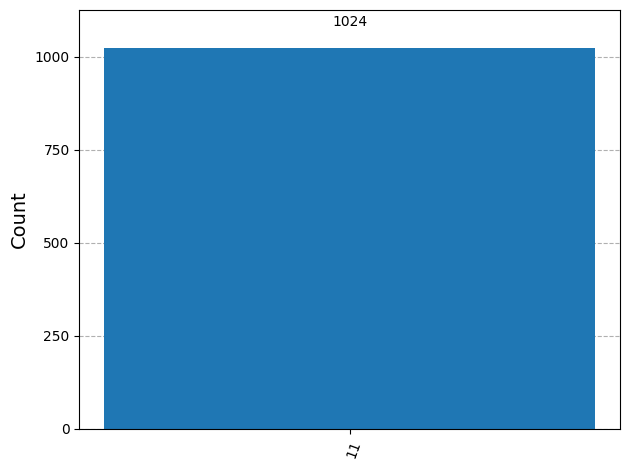


Quantum Full Subtractor (A=1, B=0, B_in=0)
Measurement results: {'11': 1024}


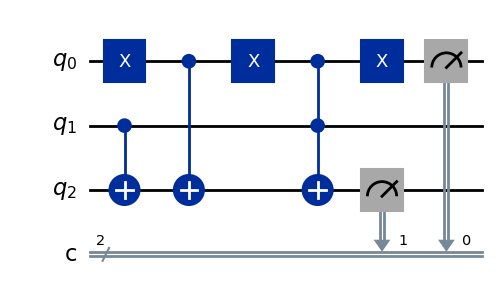

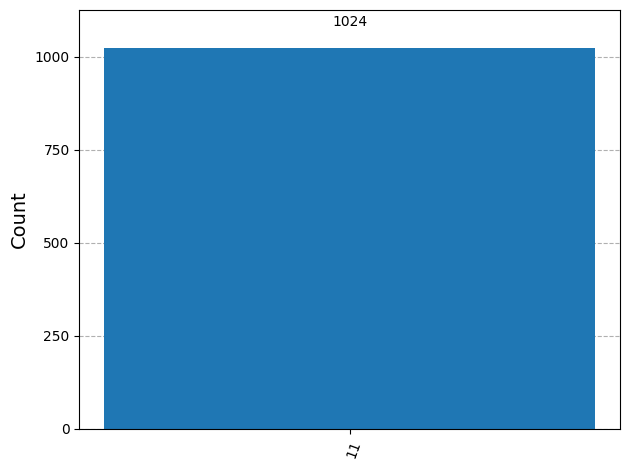

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Initialize simulator
simulator = AerSimulator()

# Function to run circuit and display results
def run_and_visualize(circuit, shots=1024):
    result = simulator.run(circuit, shots=shots).result()
    counts = result.get_counts(circuit)
    print(f"Measurement results: {counts}")
    display(circuit.draw(output='mpl'))
    display(plot_histogram(counts))

# --- Quantum Half Adder ---
# Inputs: qubit 0 (A), qubit 1 (B)
# Outputs: qubit 1 (sum), qubit 2 (carry)
print("Quantum Half Adder (A=1, B=1)")
qc_ha = QuantumCircuit(3, 2)
qc_ha.x(0)  # Set A=1
qc_ha.x(1)  # Set B=1
qc_ha.cx(0, 1)  # Sum: A XOR B
qc_ha.cx(1, 2)  # Partial carry
qc_ha.cx(0, 2)  # Carry: A AND B
qc_ha.measure([1, 2], [0, 1])  # Measure sum, carry
run_and_visualize(qc_ha)

# --- Quantum Half Subtractor ---
# Inputs: qubit 0 (A), qubit 1 (B)
# Outputs: qubit 1 (difference), qubit 2 (borrow)
print("\nQuantum Half Subtractor (A=1, B=0)")
qc_hs = QuantumCircuit(3, 2)
qc_hs.x(0)  # Set A=1
# No x(1) for B=0
qc_hs.cx(0, 1)  # Difference: A XOR B
qc_hs.x(1)  # Prepare for borrow
qc_hs.ccx(0, 1, 2)  # Borrow: NOT(A) AND B
qc_hs.x(1)  # Undo preparation
qc_hs.measure([1, 2], [0, 1])  # Measure difference, borrow
run_and_visualize(qc_hs)

# --- Quantum Full Adder ---
# Inputs: qubit 0 (A), qubit 1 (B), qubit 2 (C_in)
# Outputs: qubit 5 (sum), qubit 7 (carry-out)
print("\nQuantum Full Adder (A=1, B=1, C_in=1)")
qc_fa = QuantumCircuit(8, 2)
qc_fa.x(0)  # Set A=1
qc_fa.x(1)  # Set B=1
qc_fa.x(2)  # Set C_in=1
qc_fa.barrier()
# AND gate: A AND B
qc_fa.ccx(0, 1, 3)
# OR gate: A OR B
qc_fa.cx(0, 4)
qc_fa.cx(1, 4)
# OR gate: C_in OR (A OR B)
qc_fa.cx(2, 5)
qc_fa.cx(4, 5)
# AND gate: C_in AND (A OR B)
qc_fa.ccx(2, 4, 6)
# Carry-out: (A AND B) OR (C_in AND (A OR B))
qc_fa.x(3)
qc_fa.x(6)
qc_fa.ccx(3, 6, 7)
qc_fa.x(7)
qc_fa.measure([5, 7], [0, 1])  # Measure sum, carry-out
run_and_visualize(qc_fa)

# --- Quantum Full Subtractor ---
# Inputs: qubit 0 (A), qubit 1 (B), qubit 2 (B_in)
# Outputs: qubit 1 (difference), qubit 2 (borrow-out)
print("\nQuantum Full Subtractor (A=1, B=0, B_in=0)")
qc_fs = QuantumCircuit(3, 2)
qc_fs.x(0)  # Set A=1
# No x(1) for B=0
# No x(2) for B_in=0
qc_fs.cx(1, 2)  # B XOR B_in
qc_fs.cx(0, 2)  # Difference: A XOR (B XOR B_in)
qc_fs.x(0)  # Prepare for borrow
qc_fs.ccx(0, 1, 2)  # Borrow-out: NOT(A) AND B OR NOT(A XOR B) AND B_in
qc_fs.x(0)  # Undo preparation
qc_fs.measure([0, 2], [0, 1])  # Measure difference, borrow-out
run_and_visualize(qc_fs)